# Unsupervised Clustering

Objective: Learn the basics of unsupervised clustering method

* K-Means method
* Silhouette score


K Means is an algorithm for unsupervised clustering: that is, finding clusters in data based on the data attributes alone (not the labels).

K Means searches for cluster centers which are the mean of the points within them, such that every point is closest to the cluster center it is assigned to by using Expectation-Maxzimization approach.

In [18]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns
sns.set()

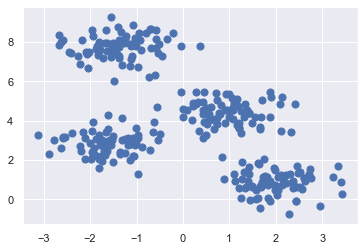

In [19]:

from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], s=50);

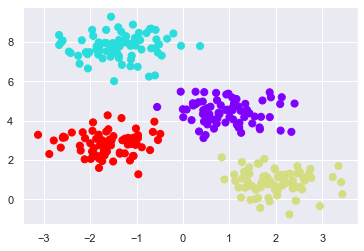

In [20]:
from sklearn.cluster import KMeans
est = KMeans(4)  # 4 clusters
est.fit(X)
y_kmeans = est.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='rainbow');

(1.0, 10.0)

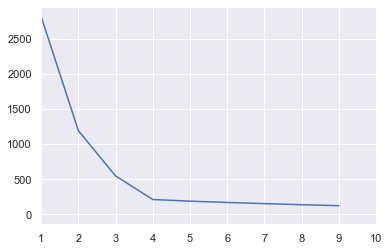

In [21]:
from sklearn.cluster import KMeans
nk_max = 10
nk_inertia = np.zeros(nk_max)
for nk in range(1, nk_max):
    est_nk = KMeans(n_clusters=nk)
    clusters_nk = est_nk.fit_predict(X)
    nk_inertia[nk] = est_nk.inertia_
    #print(nk, nk_inertia[nk])
plt.plot(nk_inertia)
plt.xlim([1,nk_max])

(1.0, 10.0)

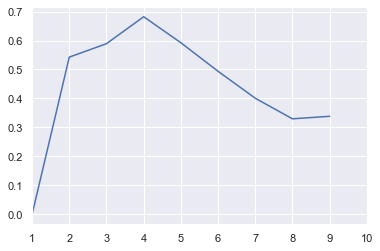

In [22]:
from sklearn.metrics import silhouette_score
nk_max = 10
nk_silhouette = np.zeros(nk_max)
for nk in range(2, nk_max):
    est_nk = KMeans(n_clusters=nk)
    clusters_nk = est_nk.fit_predict(X)
    nk_silhouette[nk] = silhouette_score(X, clusters_nk)

plt.plot(nk_silhouette)
plt.xlim([1,nk_max])

In [23]:
from sklearn import metrics

def bench_k_means(data, min_cluster, max_cluster):
    df = pd.DataFrame(columns=['Cluster_size', 'inertia', 'homogeneity', 'completeness', 'v_measure', \
                              'adjusted_rand', 'adjusted_mutual_info', 'silhouette'])
    i = 0
    for nkc in range(min_cluster, max_cluster):
        print(nkc) 
        estimator = KMeans(n_clusters=nkc, init="random", n_init=10)
        estimator.fit(data)
        print(estimator.inertia_)
        metric_values = np.zeros(8)
        metric_values[0] = nkc
        metric_values[1] = estimator.inertia_
        metric_values[2] = metrics.homogeneity_score(y, estimator.labels_)
        metric_values[3] = metrics.completeness_score(y, estimator.labels_)
        metric_values[4] = metrics.v_measure_score(y, estimator.labels_)
        metric_values[5] = metrics.adjusted_rand_score(y, estimator.labels_)
        metric_values[6] = metrics.adjusted_mutual_info_score(y,  estimator.labels_)
        metric_values[7] = metrics.silhouette_score(data, estimator.labels_,metric='euclidean') 
        df.loc[i] = metric_values
        i = i + 1
    
    return df
    

In [24]:
nc_min = 2
nc_max = 10
df_metrics = bench_k_means(X, nc_min, nc_max)
df_metrics

2
1190.782359364345
3
546.8911504626301
4
212.00599621083472
5
188.77323556773712
6
171.31030696288514
7
154.69999345446845
8
137.13684915270468
9
126.34300864163876


,Cluster_size,inertia,homogeneity,completeness,v_measure,adjusted_rand,adjusted_mutual_info,silhouette
0,2.0,1190.782359,0.388664,0.946028,0.550969,0.327269,0.548633,0.542642
1,3.0,546.891150,0.738873,0.983011,0.843634,0.707879,0.842319,0.589039
2,4.0,212.005996,1.000000,1.000000,1.000000,1.000000,1.000000,0.681994
3,5.0,188.773236,1.000000,0.890430,0.942039,0.914058,0.941224,0.592388
4,6.0,171.310307,1.000000,0.801258,0.889665,0.818179,0.887822,0.489865
5,7.0,154.699993,1.000000,0.729416,0.843540,0.715476,0.840553,0.387329
6,8.0,137.136849,0.988262,0.669372,0.798144,0.618346,0.793813,0.330755
7,9.0,126.343009,0.983243,0.630663,0.768440,0.565591,0.762912,0.344206


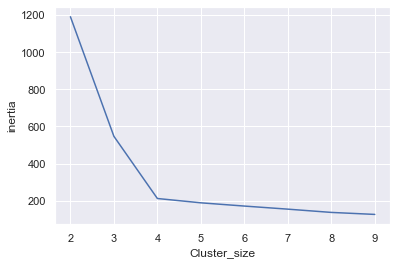

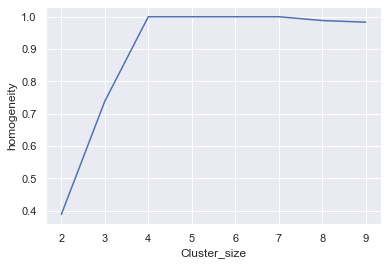

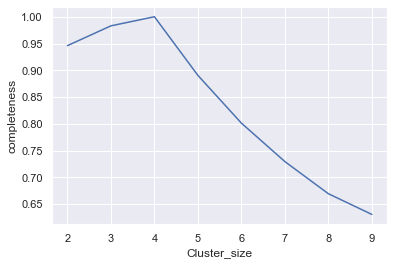

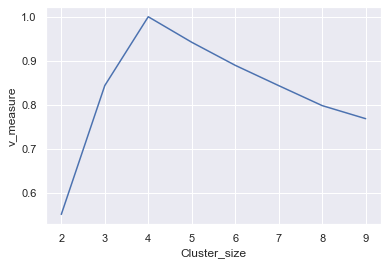

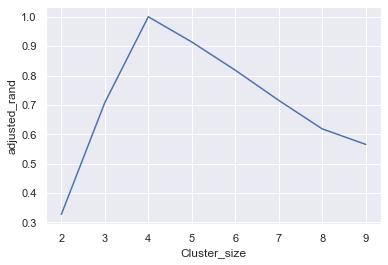

<Figure size 432x288 with 0 Axes>

In [25]:
l=list(df_metrics.columns[1:7])
for i in range(len(l)-1):
    sns.lineplot(x='Cluster_size',y=l[i], data=df_metrics, palette='winter')
    plt.figure()
